In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%time df_jval = pd.read_csv('jval.csv')

CPU times: user 1.81 s, sys: 127 ms, total: 1.94 s
Wall time: 1.94 s


In [3]:
df_jval.describe()

,1/O2/O2,2/O3/O3,3/O3/O3(1D),6/NO/NO,7/CH2O/H2COa,8/CH2O/H2COb,9/H2O2/H2O2,10/MP/CH3OOH,11/NO2/NO2,12/NO3/NO3,...,121/IONO2/IONO2,122/I2O2/I2O2,123/CH3I/CH3I,124/CH2I2/CH2I2,125/CH2ICl/CH2ICl,126/CH2IBr/CH2IBr,127/I2O4/I2O2,128/I2O3/I2O3,129/IBr/IBr,130/ICl/ICl
count,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,6.624000e+04,66240.000000,66240.000000,...,66240.000000,66240.000000,6.624000e+04,66240.000000,6.624000e+04,6.624000e+04,66240.000000,66240.000000,66240.000000,66240.000000
mean,3.146392e-23,1.747627e-04,7.114664e-06,7.397172e-21,1.041820e-05,1.700476e-05,2.177038e-06,1.766407e-06,0.003313,0.077063,...,0.003438,0.016256,1.755166e-06,0.002683,4.356593e-05,1.540992e-04,0.016256,0.014323,0.033050,0.010531
std,1.222728e-21,2.142729e-04,1.346757e-05,2.810189e-19,1.495635e-05,2.322146e-05,3.089548e-06,2.444650e-06,0.004285,0.093968,...,0.004515,0.021180,2.669681e-06,0.003724,6.330642e-05,2.201932e-04,0.021180,0.018272,0.040204,0.012834
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.042390e-32,8.311273e-07,9.663448e-09,1.712309e-30,4.209816e-08,9.787369e-08,1.076910e-08,1.007236e-08,0.000030,0.000362,...,0.000027,0.000099,6.625537e-09,0.000015,2.042169e-07,7.509635e-07,0.000099,0.000098,0.000163,0.000055
75%,4.979535e-27,3.885626e-04,7.361083e-06,2.832742e-25,1.957647e-05,3.422640e-05,4.116939e-06,3.466998e-06,0.007072,0.171123,...,0.007213,0.033953,2.933217e-06,0.005257,7.880984e-05,2.880934e-04,0.033953,0.030616,0.074268,0.023613
max,1.290387e-19,8.399320e-04,8.182655e-05,3.132245e-17,6.753271e-05,1.032846e-04,1.366264e-05,1.083354e-05,0.017753,0.358782,...,0.019189,0.088982,1.258204e-05,0.016485,2.863845e-04,9.808105e-04,0.088982,0.074659,0.155274,0.049692


In [4]:
df_jval.std().nsmallest(10)

62/ALD2/ActAlx       0.000000e+00
100/SO4/H2SO4        0.000000e+00
1/O2/O2              1.222728e-21
46/HCFC22/CHF2Cl     1.296599e-20
41/CFC115/F115       2.243739e-20
49/HCFC142b/F142b    4.935731e-20
6/NO/NO              2.810189e-19
40/CFC114/F114       3.122853e-19
43/CH3Cl/CH3Cl       6.681763e-19
36/N2O/N2O           1.820735e-18
dtype: float64

In [5]:
# drop variable with all zero values
df_jval.drop(['62/ALD2/ActAlx', '100/SO4/H2SO4'], axis=1, inplace=True)

CPU times: user 1.65 s, sys: 28.4 ms, total: 1.68 s
Wall time: 1.59 s


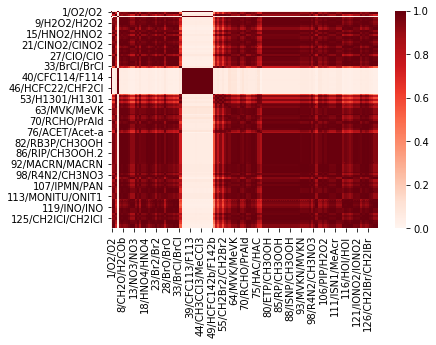

In [6]:
%%time
df_jval_corr = df_jval.corr()
sns.heatmap(df_jval_corr, vmin=0, vmax=1, cmap='Reds')

In [7]:
scaler = StandardScaler()

In [8]:
jval_normed = scaler.fit_transform(df_jval)

In [9]:
jval_normed.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [10]:
pca = PCA(n_components=3)

In [11]:
pca.fit(jval_normed)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.explained_variance_ratio_, np.cumsum(pca.explained_variance_ratio_)

(array([0.82065092, 0.13257118, 0.03919212]),
 array([0.82065092, 0.95322211, 0.99241423]))

In [13]:
jval_reduced = pca.transform(jval_normed)
jval_reduced.shape

(66240, 3)

In [14]:
jval_recover = scaler.inverse_transform(pca.inverse_transform(jval_reduced))
jval_recover.shape

(66240, 120)

In [15]:
jval_r2 = r2_score(jval_recover, df_jval, multioutput='raw_values')
print(jval_r2)

[0.99763115 0.98383267 0.99688348 0.95595594 0.99669175 0.99703044
 0.9981127  0.99827589 0.99905669 0.9801059  0.9801059  0.99154815
 0.9990101  0.99838602 0.99330559 0.99330559 0.99904324 0.99834423
 0.9985188  0.99938413 0.9850509  0.99884698 0.99934222 0.99962063
 0.99690257 0.99827338 0.99899686 0.99899686 0.99469646 0.99858959
 0.99525011 0.95742292 0.99973443 0.99992259 0.99866143 0.99918509
 0.99935089 0.99945723 0.99854033 0.99893249 0.99997895 0.99951868
 0.99941539 0.99968489 0.99915185 0.99935165 0.7321459  0.99497099
 0.98097895 0.99346776 0.98035217 0.99182953 0.99468543 0.98010696
 0.97995832 0.97995832 0.97995832 0.99862903 0.99762624 0.96837946
 0.99709962 0.99135855 0.99255316 0.99755945 0.99764012 0.99803693
 0.9950054  0.92867667 0.99827589 0.99827589 0.99827589 0.99827589
 0.99827589 0.99827589 0.99827589 0.99827589 0.99827589 0.99827589
 0.99827589 0.99827589 0.99827589 0.99827589 0.99827589 0.99827589
 0.9968254  0.99728434 0.99811004 0.99811004 0.99723988 0.9982

In [16]:
jval_r2.min(), jval_r2.argmin() # the only one that doesn't do very well

(0.7321459047173104, 46)

In [17]:
df_recover = pd.DataFrame(jval_recover, columns=df_jval.columns)
df_recover.head() # some slightly negative values

,1/O2/O2,2/O3/O3,3/O3/O3(1D),6/NO/NO,7/CH2O/H2COa,8/CH2O/H2COb,9/H2O2/H2O2,10/MP/CH3OOH,11/NO2/NO2,12/NO3/NO3,...,121/IONO2/IONO2,122/I2O2/I2O2,123/CH3I/CH3I,124/CH2I2/CH2I2,125/CH2ICl/CH2ICl,126/CH2IBr/CH2IBr,127/I2O4/I2O2,128/I2O3/I2O3,129/IBr/IBr,130/ICl/ICl
0,9.862665e-25,0.000006,1.331644e-07,3.097972e-22,-2.027639e-07,-2.493006e-07,-2.260023e-08,-2.257859e-08,0.000002,0.00269,...,-0.000016,0.000041,-4.419993e-09,-0.000036,-2.290306e-07,-0.000002,0.000041,0.000131,0.001313,0.000397
1,9.862665e-25,0.000006,1.331644e-07,3.097972e-22,-2.027639e-07,-2.493006e-07,-2.260023e-08,-2.257859e-08,0.000002,0.00269,...,-0.000016,0.000041,-4.419993e-09,-0.000036,-2.290306e-07,-0.000002,0.000041,0.000131,0.001313,0.000397
2,9.862665e-25,0.000006,1.331644e-07,3.097972e-22,-2.027639e-07,-2.493006e-07,-2.260023e-08,-2.257859e-08,0.000002,0.00269,...,-0.000016,0.000041,-4.419993e-09,-0.000036,-2.290306e-07,-0.000002,0.000041,0.000131,0.001313,0.000397
3,9.862665e-25,0.000006,1.331644e-07,3.097972e-22,-2.027639e-07,-2.493006e-07,-2.260023e-08,-2.257859e-08,0.000002,0.00269,...,-0.000016,0.000041,-4.419993e-09,-0.000036,-2.290306e-07,-0.000002,0.000041,0.000131,0.001313,0.000397
4,9.862665e-25,0.000006,1.331644e-07,3.097972e-22,-2.027639e-07,-2.493006e-07,-2.260023e-08,-2.257859e-08,0.000002,0.00269,...,-0.000016,0.000041,-4.419993e-09,-0.000036,-2.290306e-07,-0.000002,0.000041,0.000131,0.001313,0.000397


CPU times: user 20.7 s, sys: 497 ms, total: 21.2 s
Wall time: 21.7 s


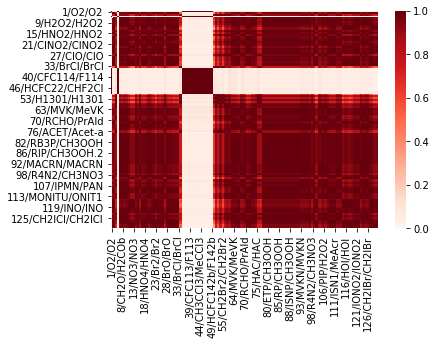

In [18]:
%%time
df_recover_corr = df_recover.corr()
sns.heatmap(df_recover_corr, vmin=0, vmax=1, cmap='Reds')
# still keeps the original correlation structure!